# Data Scientist Associate Case Study

## Company Background
EMO is a manufacturer of motorcycles. The company successfully launched its first electric moped in India in 2019. The product team knows how valuable owner reviews are in making improvements to their mopeds. 

Unfortunately they often get reviews from people who never owned the moped. They don’t want to consider this feedback, so would like to find a way to identify reviews from these people. They have obtained data from other mopeds, where they know if the reviewer owned the moped or not. They think this is equivalent to their own reviews.   


## Customer Question
Your manager has asked you to answer the following:
- Can you predict which reviews come from people who have never owned the moped before?  


## Dataset
The dataset contains reviews about other mopeds from a local website. The data you will use for this analysis can be accessed here: `"data/moped.csv"`

| Column Name      | Criteria                                                                                                                                                                    |
|------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Used it for      | Character, the purpose of the electric moped for the user, one of “Commuting”, “Leisure”.                                                                                   |
| Owned for        | Character, duration of ownership of vehicle one of  “<= 6 months”, “> 6 months”, “Never Owned”.  Rows that indicate ownership should be combined into the category “Owned”. |
| Model name       | Character, the name of the electric moped.                                                                                                                                   |
| Visual Appeal    | Numeric, visual appeal rating (on a 5 point scale, replace missing values with 0).                                                                                           |
| Reliability      | Numeric, reliability rating (on a 5 point scale, replace missing values with 0).                                                                                             |
| Extra Feature    | Numeric, extra feature rating (on a 5 point scale, replace missing values with 0).                                                                                         |
| Comfort          | Numeric, comfort rating (on a 5 point scale, replace missing values with 0).                                                                                                 |
| Maintenance cost | Numeric, maintenance cost rating (on a 5 point scale, replace missing values with 0).                                                                                        |
| Value for money  | Numeric, value for money rating (on a 5 point scale, replace missing values with 0).                                                                                         |

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score, roc_auc_score, precision_score
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTENC

# Data Scientist Associate Case Study Submission

Use this template to complete your analysis and write up your summary for submission.


In [3]:
#load dataset
df = pd.read_csv("data/moped.csv")
df.head()

,Used it for,Owned for,Model Name,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money
0,Commuting,Never owned,TVS iQube,3.0,4.0,NaN,4.0,NaN,1.0
1,Leisure,> 6 months,TVS iQube,3.0,1.0,NaN,3.0,NaN,3.0
2,Commuting,<= 6 months,TVS iQube,4.0,4.0,NaN,5.0,NaN,2.0
3,Commuting,> 6 months,TVS iQube,1.0,1.0,NaN,1.0,NaN,1.0
4,Commuting,> 6 months,TVS iQube,3.0,4.0,NaN,3.0,NaN,2.0


In [4]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Used it for       713 non-null    object 
 1   Owned for         713 non-null    object 
 2   Model Name        713 non-null    object 
 3   Visual Appeal     713 non-null    float64
 4   Reliability       713 non-null    float64
 5   Extra Features    183 non-null    float64
 6   Comfort           510 non-null    float64
 7   Maintenance cost  176 non-null    float64
 8   Value for Money   370 non-null    float64
dtypes: float64(6), object(3)
memory usage: 50.3+ KB


In [5]:
#check the number of missing value
df.isnull().sum()

Used it for           0
Owned for             0
Model Name            0
Visual Appeal         0
Reliability           0
Extra Features      530
Comfort             203
Maintenance cost    537
Value for Money     343
dtype: int64

Four columns have many null values. We will handle the null values by filling them with 0.

## Data Validation
Describe the validation tasks you completed and what you found. Have you made any changes to the data to enable further analysis? Remember to describe what you did for every column in the data. 

### 1. Used it for
I would make sure that this column only has two values ​​which are 'Commuting' and 'Leisure'. The column 'Used it for' has no values other than the two mentioned.

In [6]:
df['Used it for'].unique()

array(['Commuting', 'Leisure'], dtype=object)

### 2. Owned for
I would make sure that this column has three values, namely 'Never owned', '>6 months', and '<= 6 months'. The 'Owned for' attribute will be used as a label or target for the machine learning model. Values '> 6 months', and '<= 6 months' need to be changed to 'Owned'.


In [7]:
df['Owned for'].unique()

array(['Never owned', '> 6 months', '<= 6 months'], dtype=object)

In [8]:
df = df.replace(to_replace=['> 6 months', '<= 6 months'], value='Owned')
df['Owned for'].unique()

array(['Never owned', 'Owned'], dtype=object)

### 3. Model Name
I'll see what unique values are in ​​this attribute. We will not make any changes to this attribute.

In [9]:
df['Model Name'].unique()

array(['TVS iQube', 'Revolt RV 400', 'Bajaj Chetak', 'OLA S1 Pro',
       'Ather 450X', 'Hero Electric Optima', 'Tork Kratos', 'OLA S1',
       'Bounce Infinity E1', 'Hero Electric Optima CX',
       'Hero Electric Flash', 'Ampere Magnus EX', 'Revolt RV 300',
       'Hero Electric Photon', 'Okinawa Praise', 'Benling Aura',
       'Ampere Magnus Pro', 'PURE EV EPluto 7G', 'Ampere REO',
       'Odysse Evoqis', 'Okinawa i-Praise', 'Joy e-bike Monster',
       'PURE EV ETrance Neo', 'Evolet Polo', 'Okinawa Ridge Plus',
       'Ampere Zeal', 'Hero Electric Atria', 'Okinawa Lite',
       'Hero Electric NYX', 'Okinawa R30', 'Yo Drift', 'BGauss B8',
       'Joy e-bike Wolf', 'Gemopai Astrid Lite', 'Techo Electra Emerge',
       'Techo Electra Raptor', 'e-bike Gen Nxt', 'Gemopai Ryder'],
      dtype=object)

### 4. Visual Appeal
This attribute has no null value, so I didn't make any changes.

### 5. Reliability
This attribute has no null value, so I didn't make any changes.

### 6. Extra Features
In this attribute, there are 530 null values, so we need to make changes by changing the null value to zero.

In [10]:
df['Extra Features'] = df['Extra Features'].fillna(0)

### 7. Comfort 
In this attribute, there are 203 null values, so we need to make changes by changing the null value to zero.

In [11]:
df['Comfort'] = df['Comfort'].fillna(0)

### 8. Maintenance Cost
In this attribute, there are 537 null values, so we need to make changes by changing the null value to zero.

In [12]:
df['Maintenance cost'] = df['Maintenance cost'].fillna(0)

### 9. Value for Money
In this attribute, there are 343 null values, so we need to make changes by changing the null value to zero.

In [13]:
df['Value for Money'] = df['Value for Money'].fillna(0)

## Exploratory Analysis
Describe what you found in the exploratory analysis. In your description you should:
- Reference at least two different data visualizations you created above to demonstrate the characteristics of variables
- Reference at least one data visualization you created above to demonstrate the relationship between two or more variables
- Describe what your exploratory analysis has told you about the data
- Describe any changes you have made to the data to enable modeling

### 1. Label Distribution

According to the pie chart below, a dataset is categorized as an imbalance. It is because the percentage of "owned" labels is higher than "never owned" labels. We will use an upsampling or resampling technique to handle this problem.

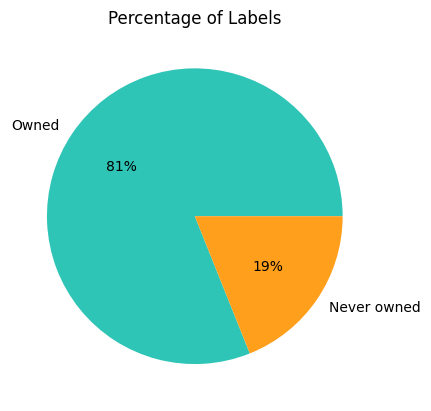

In [17]:
owned_for = df['Owned for'].value_counts() 

#create a pie chart
fig2, ax2 = plt.subplots()
ax2.pie(x=owned_for.values, labels=owned_for.index, autopct='%.0f%%', colors=["#2ec4b6","#ff9f1c"])
ax2.set_title("Percentage of Labels")
plt.show()

### 2. Distribution of Class 'Owned for' by 'Used it for'
Most of the people in the data are used mopeds for commuting. People who never owned a moped before are more likely to use it for commuting than leisure.

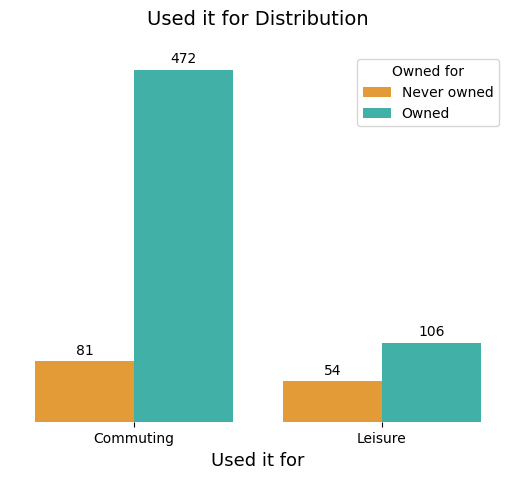

In [18]:
fig, ax = plt.subplots()
sns.countplot(data=df, x="Used it for",hue="Owned for", palette=["#ff9f1c", "#2ec4b6"], ax=ax)
for i, p in enumerate(ax.patches): 
    height = p.get_height() 
    ax.text(p.get_x()+p.get_width()/2, height+10, height, ha="center")
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 
ax.spines['bottom'].set_visible(False) 
ax.spines['left'].set_visible(False)
ax.set_title("Used it for Distribution", fontsize=14, pad=20)
ax.set_xlabel("Used it for",fontsize=13)
ax.get_yaxis().set_visible(False)
plt.show()

### 3. Model Name 

Revolt RV 400, Tork Kratos, and Hero Electric Flash are model names of mopeds that are usually used by people who never owned a moped.

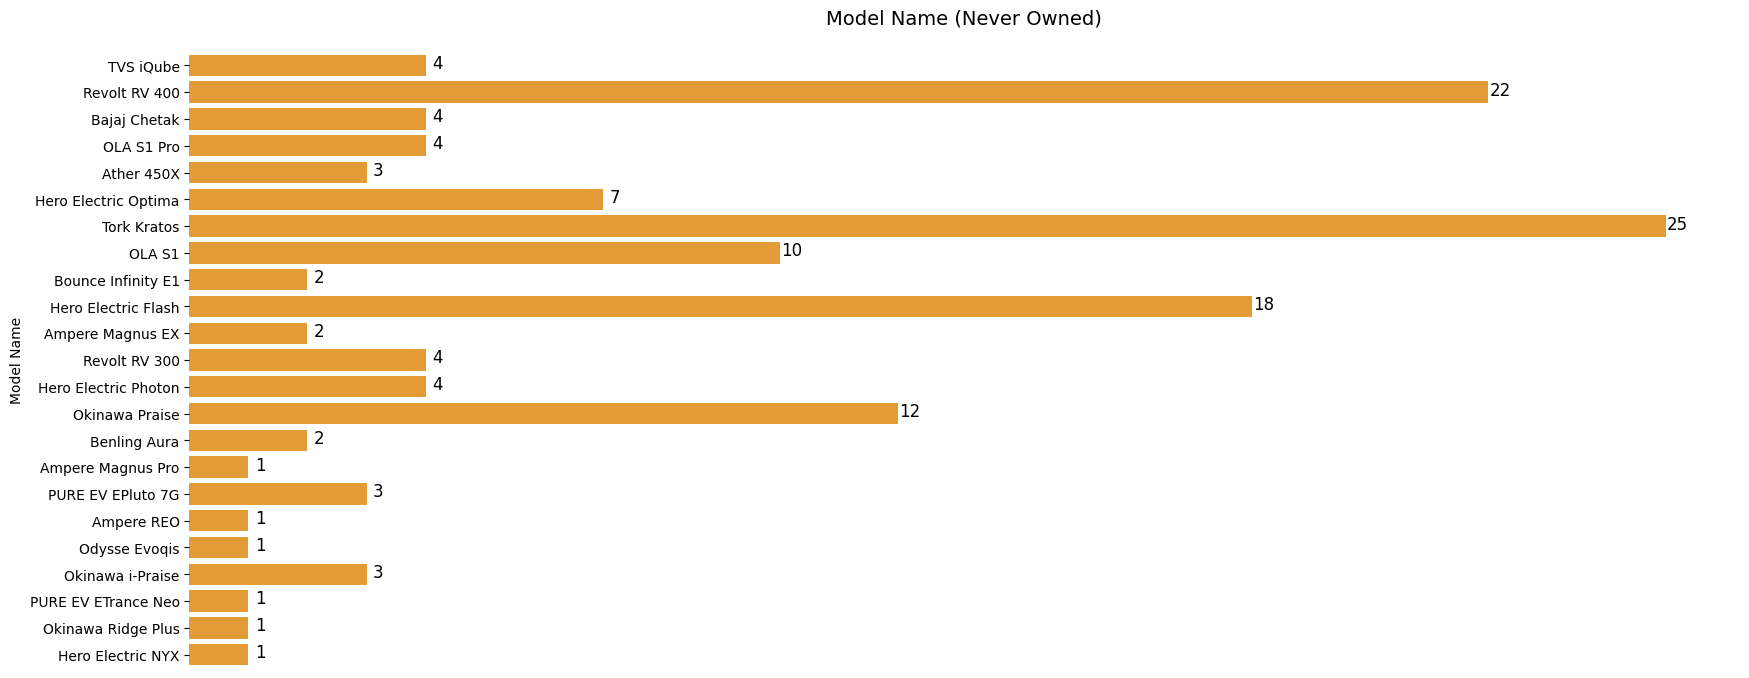

In [19]:
never_owned = df[df['Owned for']=="Never owned"]
fig, ax = plt.subplots(figsize=(20,8))
sns.countplot(data=never_owned, y="Model Name", color="#ff9f1c", ax=ax)
for i, p in enumerate(ax.patches): 
    width = p.get_width() 
    ax.text(width+0.2, i+0.1, width, ha="center", fontsize=12)
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 
ax.spines['bottom'].set_visible(False) 
ax.spines['left'].set_visible(False)
ax.set_title("Model Name (Never Owned)", fontsize=14, pad=20)
ax.set_xlabel("Model Name",fontsize=13)
ax.get_xaxis().set_visible(False)
plt.show()

### 4. Numerical Atribute vs Owned for
Most people give a score of 5 for visual appeal, comfort, and reliability criteria. There are many zero scores on extra features, maintenance cost, and value-for-money criteria. Some attribute has outliers, so I will do data scaling using Robust Scaler which works well on data with an outlier.

According to boxplot visualization, people who never owned moped tend to give a higher score on visual appeal, reliability, and comfort criteria. They also tend to give a lower score on extra features and maintenance cost criteria.

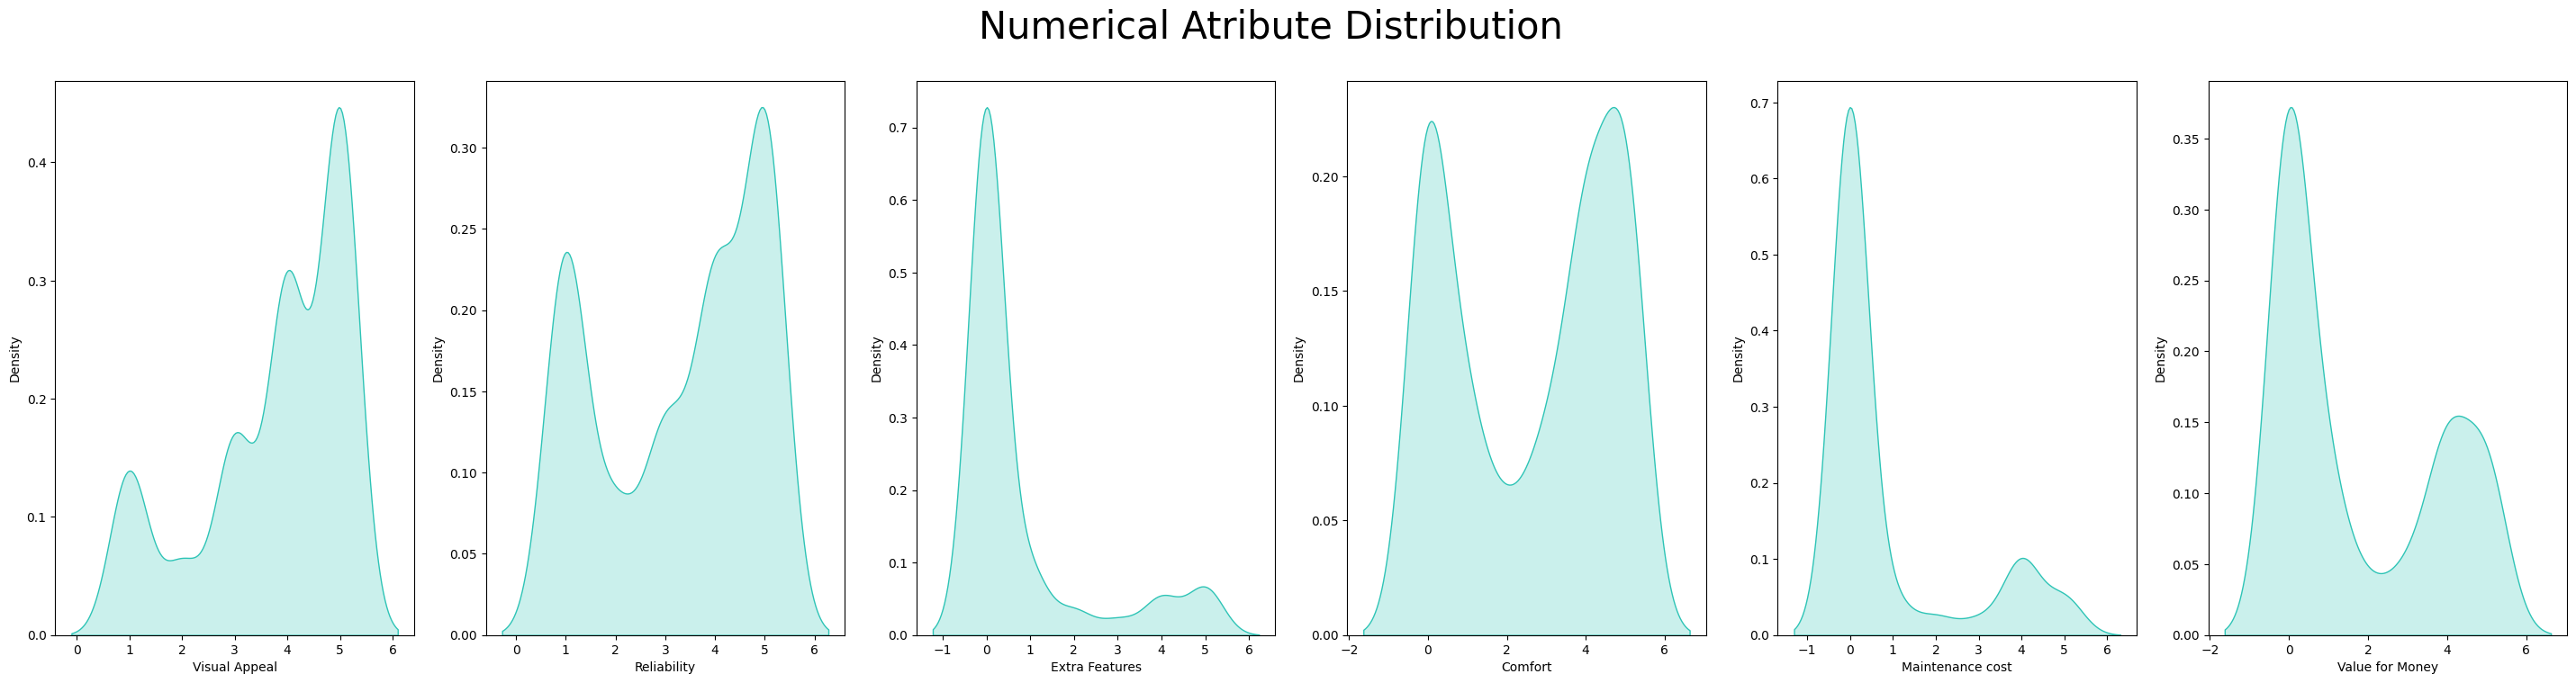

In [26]:
fig,ax = plt.subplots(ncols=6, figsize=(36,8))
for i,c in enumerate(df.select_dtypes('number').columns.tolist()):
    sns.kdeplot(x=c, ax=ax[i], data=df, fill=True, color="#2ec4b6")
plt.suptitle("Numerical Atribute Distribution", fontsize=30)
plt.show()

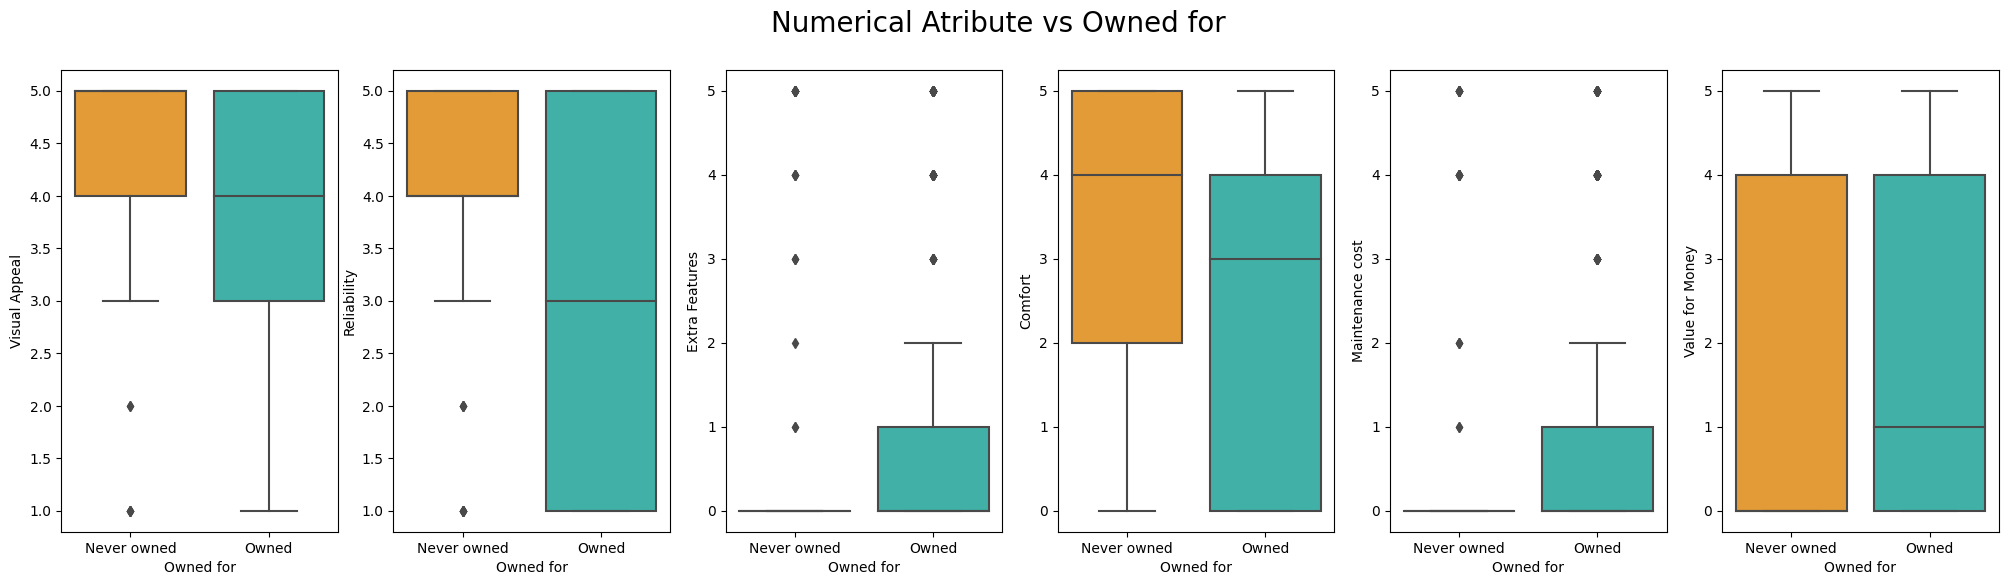

In [20]:
fig,ax = plt.subplots(ncols=6, figsize=(25,6))
for i,c in enumerate(df.select_dtypes('number').columns.tolist()):
    sns.boxplot(data=df, x='Owned for', y=c, ax=ax[i], palette=["#ff9f1c", "#2ec4b6"])
plt.suptitle("Numerical Atribute vs Owned for", fontsize=20)
plt.show()

## Data Preprocessing

According to the EDA step above, the data must be processed before we used it for modeling. There are steps of data preprocessing that I will do:
1. Binary encoding for label column.
2. Categorical encoding for used for and model name columns.
3. Data scaling for numerical columns.

In [27]:
#separate data from label
X = df.copy().drop("Owned for", axis=1)
y = df.copy()["Owned for"]

In [28]:
#binary encoding for label
y_final = y.replace({"Never owned":0, "Owned":1})

In [29]:
#categorical encoding function 

def cat_encode(data):
  #encode nominal categorical data  
  cat_df = data.select_dtypes('object')
  num_df = data.select_dtypes(exclude="object")
  cat_encode = pd.get_dummies(cat_df)
  final_cat_encode = cat_encode.join(num_df)
  return final_cat_encode

In [30]:
#categorical encoding
X_encode = cat_encode(X)

In [31]:
#scaling function
def scaler(data):
  num_df = data.select_dtypes(include=[float, int])
  cat_df = data.select_dtypes(exclude=[float, int])
  rs = RobustScaler()
  scl = rs.fit_transform(num_df)
  scl_df = pd.DataFrame(scl, columns=num_df.columns, index=num_df.index)
  final_scaled = cat_df.join(scl_df)
  return final_scaled

In [32]:
#scaling numerical data
X_final = scaler(X_encode)
X_final.head()

,Used it for_Commuting,Used it for_Leisure,Model Name_Ampere Magnus EX,Model Name_Ampere Magnus Pro,Model Name_Ampere REO,Model Name_Ampere Zeal,Model Name_Ather 450X,Model Name_BGauss B8,Model Name_Bajaj Chetak,Model Name_Benling Aura,...,Model Name_Techo Electra Raptor,Model Name_Tork Kratos,Model Name_Yo Drift,Model Name_e-bike Gen Nxt,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.5,0.0,0.0,0.2,0.0,0.00
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.5,-1.0,0.0,0.0,0.0,0.50
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.4,0.0,0.25
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-1.5,-1.0,0.0,-0.4,0.0,0.00
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.5,0.0,0.0,0.0,0.0,0.25


## Model Fitting
Describe your approach to the model fitting. In your description you should:
- Describe what type of machine learning problem you are working on
- Describe which method you selected for the baseline model and explain why you chose this model
- Describe which method you selected for the comparison model and explain why you chose this model

The type of machine learning that we will make is supervised learning classification, especially binary classification. We will try to predict which people have or do not have a moped according to reviews. There are many machine learning algorithms are used for classification. In this step, I will use two machine-learning models. There are logistic regression and decision trees.

**Baseline Model**

I will use logistic regression as the baseline model because it is very simple, faster in computation, and easier to implement. Logistic regression is suitable for binary classification. Logistic regression is also known as Binomial logistics regression based on a sigmoid function where output is probability and input can be from -infinity to +infinity.

<img src="https://www.researchgate.net/publication/338580890/figure/fig3/AS:847253531021312@1579012391039/Graph-for-Sigmoid-Function.ppm"/>

**Comparison Model**

As a comparison model, I will use a decision tree. The decision tree is more complex than logistic regression. The advantage that I like about the decision tree model is we can know the feature or attribute that is very important to label. We can also print the tree structure from sklearn to understand how the model consider whether people have a moped or not. Below is the structure of decision tree model.

<img width=400 src="https://static.javatpoint.com/tutorial/machine-learning/images/decision-tree-classification-algorithm.png"/>


During fitting the model, I will do the resampling method. I will use SMOTENC to upsample the minority class/label (Never Owned) and TomekLinks to undersample the majority class or labels (Owned).

In [33]:
X_cat_mask = [True if X_final[i].dtype == 'uint8' else False for i in X_final.columns]
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, stratify=y_final, random_state=123)

sm = SMOTENC(random_state=42, categorical_features=X_cat_mask) # Specify which features are categorical
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
    
tl = TomekLinks(sampling_strategy=[0])
X_train_smtl, y_train_smtl = tl.fit_resample(X_train_sm, y_train_sm)

### 1. Fit a Baseline

In [35]:
logreg = LogisticRegression(random_state=123, solver='liblinear')
logreg.fit(X_train_smtl, y_train_smtl)

LogisticRegression(random_state=123, solver='liblinear')

### 2. Fit a Comparison Model

In [36]:

tree = DecisionTreeClassifier(random_state=123)
tree.fit(X_train_smtl, y_train_smtl)


DecisionTreeClassifier(random_state=123)

## Model Evaluation
Explain what the results of your evaluation tell you. You should:
- Describe which metric you have selected to compare the models and why
- Explain what the outcome of this evaluation tells you about the performance of your models
- Identify, based on the evaluation, which you would consider to be the better performing approach

I will use several metrics to choose the best model:

**Precision:**
This metric is better when we prefer someone who is predicted to not own a moped but has one. I would consider this metric more than any other metric because the number of never owned labels (0) is less than an owned label (1).

**Recall:**

This metric is the opposite of recall. This metric is better when we prefer someone who is predicted to own a moped but doesn't have one.

**F1-Score:**

This metric consider the recall and precision score. The higher F1-score, the model will better.

**AUC Score:**

The higher auc score, the model will better classify which people owned or never owned a moped.

**Accuracy:**

Accuracy will be misleading for imbalance classification, so I will not prioritize this metrics.

In [37]:
logreg_pred = logreg.predict(X_test)
tree_pred = tree.predict(X_test)

In [38]:
model_name = ["Logistic Regression", "Decision Tree Classifier"]
results = {}
for name, pred in zip(model_name,[logreg_pred, tree_pred]):
    recall = recall_score(y_test, pred)
    precision = precision_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    acc = accuracy_score(y_test, pred)
    results[f"{name}"] = {
        					"Recall":recall,
        					"Precision":precision,
        					"AUC Score":auc,
        					"F1-Score": f1,
        					"Accuracy":acc
    }

In [39]:
res = pd.DataFrame.from_dict(results).T

(res
 .style
 .highlight_max(color="#2ec4b6", subset=["Recall","Precision","AUC Score","F1-Score","Accuracy"]) 
 .format(precision=2)
)

,Recall,Precision,AUC Score,F1-Score,Accuracy
Logistic Regression,0.81,0.90,0.72,0.85,0.78
Decision Tree Classifier,0.73,0.86,0.61,0.79,0.69


From the result above, logistic regression is considered the best model because this model has the best score in five criteria. This model has a very good score in Recall (0.81) and Precision (0.90). According to the AUC score, this model is quite good at distinguishing between people who have mopeds and those who don't. According to accuracy, this model still has an error in prediction.



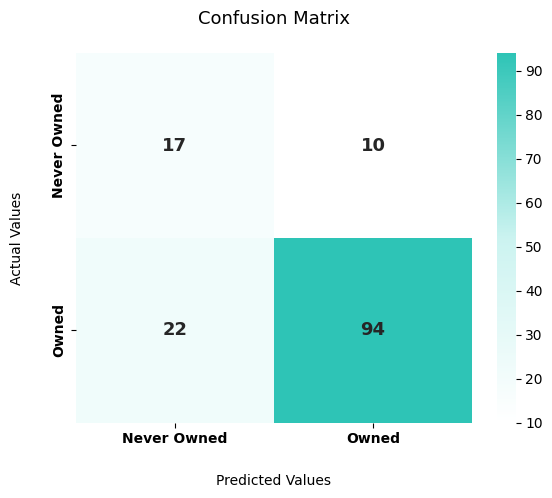

In [40]:
cm = confusion_matrix(y_test, logreg_pred)
norm=plt.Normalize(0,700)
cmap = colors.LinearSegmentedColormap.from_list("", ["white","#cbf3f0","#2ec4b6"])

ax = sns.heatmap(cm, annot=True, cmap=cmap, fmt="g", annot_kws={"fontsize":13, "fontweight":"bold"})

ax.set_title('Confusion Matrix\n', fontsize=13);
ax.set_xlabel('Predicted Values', labelpad=20)
ax.set_ylabel('Actual Values', labelpad=20);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Never Owned','Owned'], fontweight="bold")
ax.yaxis.set_ticklabels(['Never Owned','Owned'], fontweight="bold")

## Display the visualization of the Confusion Matrix.
plt.show()

With the confusion matrix, we will know the distribution of label prediction. Seventeen of 27 from never owned class are correctly predicted. Ninety-four of 116 from owned class are correctly predicted.  

## ✅ When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review grading rubric, have you included everything that will be graded?
- Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your case study